<p style='text-align:center'>
PSY 394U <b>Methods for fMRI</b>, Fall 2019


<img style='width: 300px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Placebo_Left.png?raw=true' alt='brain blobs'/>

</p>

<p style='text-align:center; font-size:40px; margin-bottom: 30px;'><b> Machine learning: brief introduction </b></p>

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b> November 11, 2019 </b></p>

<hr style='height:5px;border:none' />

# 0. What is machine learning?
<hr style="height:1px;border:none" />

The main goal of **machine learning** is to build (*or to* ***learn***) a predictive model based on available data. Although machine learning is built upon statistical concept, it is different from traditional statistics, where inference and estimation are performed based on known statistical distributions. 

Machine learning is a data-driven approach. Some machine learning methods may work well for some data, but may not work well for other types of data. There is no machine learning method that works well for any data. People usually have to choose a machine learning method that works well for their data (often via trails and errors).

## Supervised v.s. unsupervised learning

In machine learning, a data set consists of **features**, or variables used to make predictions. A data set may also contain the **labels**, the true group assignments or classes. The goal of **supervised learning** is to train a model to predict labels based on the available features. **Classification**, or assignment of observations into distinct categories, is a popular example of supervised learning. 

Supervised learning models are often constructed -- *learned or* ***trained*** -- using a portion of a data set, known as the **training data**. The resulting model is validated using the remaining portion of the data set known as the **testing data**. This framework is necessary to avoid **overfitting**, where the model can predict the training data very accurately but unable to predict on new data sets.

Unlike supervised learning, true labels may not be available for **unsupervised learning**. The goal of unsupervised learning is to find patterns in the data (often without labels). **Clustering**, or finding natural grouping of observations with similar features, is one example of unsupervised learning. **Dimension reduction**, or describing a large number of features with a small number of summary features, is another 

## Glossary of machine learning

Just FYI, there is a glossary of machine learning terms available from Google's [machine learning tutorial](https://developers.google.com/machine-learning/glossary). 


# 1. Simple clustering example
<hr style="height:1px;border:none" />

Now let's take a look at a simple example of clustering. The goal of clustering is to identify grouping of observations based on similarities in features. In this example, we will use **K-means** clustering method.

## Iris data
This is a famous data set with the lengths and widths of the petal and the sepal of 3 different types of irises (Setosa, Versicolour, and Virginica). This is one of example data sets available in **Scikit-learn** (or **`sklearn`**, a popular machine learning library in Python). The data is stored in a 2D array of 150 rows (150 irises) and 4 columns of ***features*** (a.k.a., variables) (sepal length, sepal width, petal length and petal width).

<img style="width: 300px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/PCA_Iris.jpg?raw=true" alt="Iris with labels"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;">Source: https://www.math.umd.edu/~petersd/666/html/iris_pca.html </p>

Let's take a look at the data set. First, we generate scatter plots. 

[`<IrisCluster.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisCluster.py)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


# Loading the iris data
iris = datasets.load_iris()
X = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features


In [1]:
%matplotlib inline

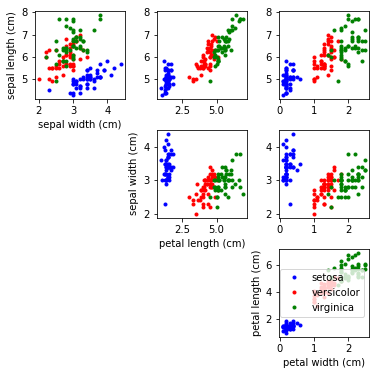

In [15]:
# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
y_set = list(set(y))
c_points = ['b.','r.','g.']
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        for iIris in y_set:
            plt.plot(X[y==iIris,iCol], X[y==iIris,iRow],
                     c_points[iIris], label=targetNames[iIris])
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])
        if iRow==(nVar-2) and iCol==(nVar-1):
            plt.legend()

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()

## Clustering
For this example, we use the **K-means clustering** method. The K-means clustering splits the data into **K** clusters of similar sizes. This algorithm starts by choosing **K** centroids in the feature space, defining the centers of **K** clusters. Then it assigns each observation to a cluster by minimizing the distance between the observation and a centroid. 

K-means clustering is available in **`sklearn.cluster`** as a transformation object **`KMeans`**. Here, the number of clusters **`n_clusters`** is a *required* parameter. We can use the **`.fit()`** method to fit the data, and cluster assignments can be found as the attribute **`.labels_`**. The coordinates for the centroids can be found as the attribute **`.cluster_centers_`**. 

In [6]:
# K-means clustering
numClus = 3  # number of clusters
km = KMeans(n_clusters=numClus)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates


Now, let's see how well the K-means algorithm worked.

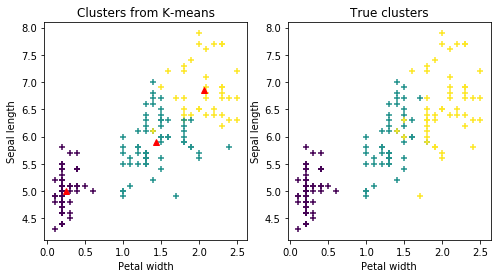

In [7]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from K-means
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.plot(y_cent[:,3],y_cent[:,0],'r^')  # Ploting centroids
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=y,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()


The red triangles indicate the centroids.

# 2. Normalizing data
<hr style="height:1px;border:none" />

In the iris data, you may notice that scales are somewhat different between different features.

[`<IrisClusterNorm.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisClusterNorm.py)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


# Loading the iris data
iris = datasets.load_iris()
X_raw = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features


# characteristics of features
pd.DataFrame(X_raw, columns=varNames).describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


You see that means and SDs are quite different. If features have different magnitudes, then the ones with a large magnitude tend to dominate the outcome. Thus, if features are in different scales, it is a good idea to **normalize** (or **standardize**) the features. This is done by subtracting the mean from each feature, and dividing by its SD. This results in features with mean approximately 0 and SD approximately 1. 

To do so, we can use a transformation object **`StandardScaler`** available in **`sklearn.preprocessing`**.

In [19]:
# standardizing the features
irisNorm = StandardScaler().fit(X_raw)  # learning standardization
X = irisNorm.transform(X_raw)  # transforming the raw features

The first line defines the standardization object named **`irisNorm`**. It learns standardization from the raw features in **`X_raw`** with the **`.fit()`** method. Then the resulting transformation object is used to actually transform the raw features `X_raw` with the **`.transform()`** method. Let's examine the mean and SD of normalized features.

In [20]:
# characteristics of normalized features
pd.DataFrame(X, columns=varNames).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


As you can see, the means and SDs are comparable among the features. The normalization transformation only changes the scale and center the data; thus it doesn't change the relative relationships among features. When we plot the features, the plots seem very similar to our earlier plots. 

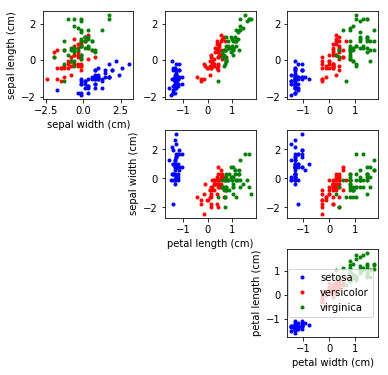

In [21]:
# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
y_set = list(set(y))
c_points = ['b.','r.','g.']
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        for iIris in y_set:
            plt.plot(X[y==iIris,iCol], X[y==iIris,iRow],
                     c_points[iIris], label=targetNames[iIris])
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])
        if iRow==(nVar-2) and iCol==(nVar-1):
            plt.legend()

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()

Now, let's perform K-means clustering again on the normalized data. 

In [22]:
# K-means clustering
numClus = 3  # number of clusters
km = KMeans(n_clusters=numClus)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates

Visualizing the resulting clusters.

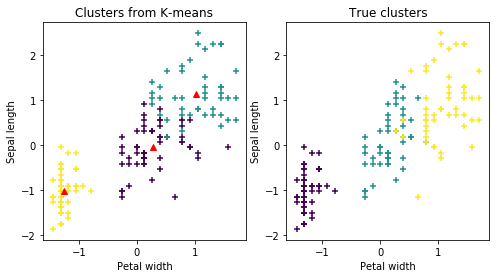

In [23]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from K-means
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.plot(y_cent[:,3],y_cent[:,0],'r^')  # Ploting centroids
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=y,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()

# 3. Evaluating clustering performance
<hr style="height:1px;border:none" />

In a rare circumstance in which you happen to have the information for the true clusters, then you can evaluate how accurate / inaccurate your clustering algorithm results are. A challenge here is that clusters may not be labeled the same in the target and clustering algorithm outcomes. For example, the *Setosa* cluster may be labeled with 0s in the target, but it may be labeled with 1s in the clustering algorithm results. Luckily, there are a number of metrics that can still evaluate the performance of clustering despite the difference in cluster labels. Here are two of those:

  * **Adjusted Rand index (ARI)**:
      * It summarizes the similarity between the cluster labels. 
      * Range: [-1, 1]. 
          * A negative ARI indicates a very bad match (independent labelings). 
          * An ARI close to 1 indicates highly similar clusters. 
          * ARI=1 indicates the perfect match.
  * **Adjusted mutual information (AMI)**:
      * It summarizes the agreement between the cluster labels. 
      * Range: [0, 1]. 
          * An AMI close to 0 indicates a very bad match (independent labelings). 
          * An AMI close to 1 indicates highly similar clusters. 
          * AMI=1 indicates the perfect match.

## Example
Let's compare the iris clustering results (without and with normalization) to the true cluster labels.

[`<ClusterEvalMetrics.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/ClusterEvalMetrics.py)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


# Loading the iris data
iris = datasets.load_iris()
X_raw = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features

# standardizing the features
irisNorm = StandardScaler().fit(X_raw)  # learning standardization
X = irisNorm.transform(X_raw)  # transforming the raw features



# K-means clustering, raw data
numClus = 3  # number of clusters
kmRaw = KMeans(n_clusters=numClus)  # defining the clustering object
kmRaw.fit(X_raw)  # actually fitting the data
yRaw_clus = kmRaw.labels_   # clustering info resulting from K-means


# K-means clustering, normalized data
kmNorm = KMeans(n_clusters=numClus)  # defining the clustering object
kmNorm.fit(X)  # actually fitting the data
yNorm_clus = kmNorm.labels_   # clustering info resulting from K-means

Now ARI.

In [28]:
# ARI
print('ARI (raw)=  %7.4f' % adjusted_rand_score(y, yRaw_clus))
print('ARI (norm)=  %7.4f' % adjusted_rand_score(y, yNorm_clus))

ARI (raw)=   0.7302
ARI (norm)=   0.6201


Looks like clustering performed poorly on the normalized data. Now AMI.

In [29]:
# AMI
print('AMI (raw)=  %7.4f' % adjusted_mutual_info_score(y, yRaw_clus))
print('AMI (norm)=  %7.4f' % adjusted_mutual_info_score(y, yNorm_clus))

AMI (raw)=   0.7484
AMI (norm)=   0.6549


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


# 4. Number of clusters
<hr style="height:1px;border:none" />

Many clustering methods often requires the number of clusters as the required parameter. However, *we don't always know how many clusters are in our data.* If we don't know the number of clusters, then we estimate the number of clusters from the data before clustering.

## Data
The data set for this example, **`wiscsem.txt`** consists of the Weschler Intelligence Scale for Children (WISC) of 175 children. There are 11 features in this data set.

 * `info`: Information
 * `comp`: Comprehension
 * `arith`: Arithmetic
 * `simil`: Similarities
 * `vocab`: Vocabulary
 * `digit`: Digit Span
 * `pictcomp`: Picture Completion
 * `parang`: Paragraph Arrangement
 * `block`: Block Design
 * `object`: Object Assembly
 * `coding`: Coding
 
<p style="text-align:center; font-size:10px; margin-top: 12px; margin-bottom: 12px;"> 
Source: Tabachnick & Fidell, <i>Using Multivariate Statistics</i>, 6th Ed. Pearson. <a href='http://media.pearsoncmg.com/ab/ab_tabachnick_multistats_6/datafiles/ASCII/wiscsem.dat'> Link to the original data</a> </p>

We are interested in seeing if there are any clusters of children with similar WISC outcomes. 

To do so, let's load the data first.

[`<WiscCluster.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/WiscCluster.py)

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# loadin the data
wiscData = pd.read_csv(os.path.join('DataML','wiscsem.txt'), sep='\t')
wiscFeatures = np.array(wiscData.iloc[:,2:13])
featureNames = np.array(wiscData.columns[2:13])

## Scree plot
One way we can determine the number of clusters is to plot the *sum of squared distances from cluster centroids (i.e., how far observations are from the centrolids)*, also known as the **inertia**. We can get the inertia by the attribute **`.inertia_`** of the clustering object. 

We run the K-means algorithm with different numbers of clusters, and calculate the corresponding inertiae. Then we plot the inertiae against the number of clusters. The inertia decreases as the number of clusters increases. However, there is an *elbow* in this plot where the rate of decrease slows down. The elbow is the point of compromise; adding more clusters does not decrease the inertia dramatically. Just FYI, this type of plot is known as a **scree plot**. It is commonly used in multivariate statistics and machine learning to determine the number of variables / factors / features to be used in an analysis. 

In this particular example, we calculate the inertia up to 20 clusters.

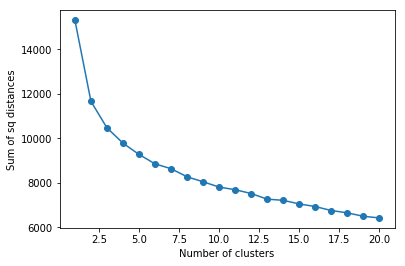

In [33]:
# determinging the number of clusters (up to 20 clusters)
SSE = []
for iClus in range(1,21):
    # K-means clustering
    km = KMeans(n_clusters=iClus)  # K-means with a given number of clusters
    km.fit(wiscFeatures)  # fitting the principal components
    SSE.append(km.inertia_) # recording the sum of square distances

# plotting the sum of square distance
plt.plot(np.arange(1,21),SSE,marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sq distances')
plt.show()

The selection of the elbow location is somewhat subjective. In this example, 3 clusters seem reasonable for this data set. So we will re-run K-means with 3 clusters.

## Clustering and results

In [34]:
## We will go with 3 clusters
# K-means clustering again
km = KMeans(n_clusters=3)
km.fit(wiscFeatures)  # fitting the principal components
y_clus = km.labels_   # clustering info resulting from K-means

Let's examine the resulting clusters by plotting some of the features with the cluster information.

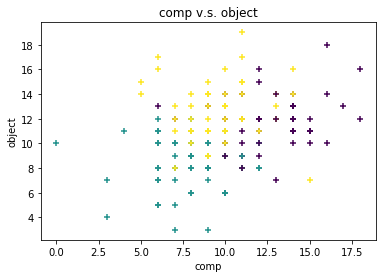

In [48]:
### plotting the clusters
# with two of the features
xFeature = 1 # index for the feature on the x-axis
yFeature = 9 # index for the feature on the y-axis
plt.scatter(wiscFeatures[:,xFeature],
            wiscFeatures[:,yFeature],c=y_clus,marker='+')
plt.xlabel(featureNames[xFeature])
plt.ylabel(featureNames[yFeature])
plt.title(featureNames[xFeature] + ' v.s. ' + featureNames[yFeature])
plt.show()


# 5. Worked example: dynamic connectivity
<hr style="height:1px;border:none" />

Now let's see how clustering can be useful in fMRI context. We will examine resting-state fMRI data, a type of fMRI data acquired while subjects *rested* inside an MRI scanner. This type of data have been widely used in studying functional connectivity, or analysis of which brain areas temporally correlate with each other.

## Data

The data is a resting-state fMRI data set from a subject in the 1000 Functional Connectomes Project (1000FCP). The raw fMRI data was pre-processed using a pipeline specifically designed for resting-state fMRI data (covered in my brain connectivity class). From the preprocessed fMRI data, mean ROI time series data were extracted with Craddock's Rt 2-level atlas with 188 ROIs (or regions of interest) covering the cerebrum.

<img style="width: 105px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Atlas_Example.png?raw=true" alt="Atlas example"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;"> Atlas example </p>


From the extract fMRI time series on 188 ROIs, dynamic connectivity was determined by calculating a series of correlation matrices between 188 ROIs (or nodes). In particular, time series data in a sliding window of 100s (or 45 TRs) is used to calculate a correlation matrix for each window. There are 167 windows in this time series. *This resulted in a series of 167 correlation matrices with size 188 x 188.*  

The series of correlation matrices (**`Leiden_sub39335_Rt2_K200_Rmat.npz`**) is found in the **`DataML`** directory.

[`<RestingStatefMRI.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/RestingStatefMRI.py)

In [51]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


##### Loading the data
infile = np.load(os.path.join('DataML',
                              'Leiden_sub39335_Rt2_K200_Rmat.npz'))
Rmat = infile['Rmat']
nodes = infile['nodes']
xyz = infile['xyz']


Here is an example of the correlation matrices.

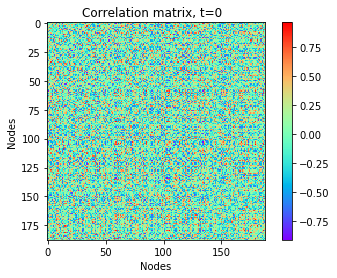

In [54]:
##### Examples of correlation matrices
indTime = 0
plt.imshow(Rmat[indTime,:,:], cmap=plt.cm.rainbow)
plt.title('Correlation matrix, t=%-3d' % indTime)
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.colorbar()

plt.show()

## Brain connectivity is dynamic
From the series of correlation matrices, we form a functional connectivity network at each time point. For details on how a functional connectivity network is formed, please refer to my brain connectivity class. The resulting networks change over time, suggesting that so-called resting-state is not static; rather changes over time. As a demonstration, we see local and global efficiencies at each node over time. These metrics describe the ease of communication with neighboring nodes (local efficiency) and any nodes in the network (global efficiency) originating from a particular node. We plot efficiency metrics because it is hard to plot correlation matrices over time!

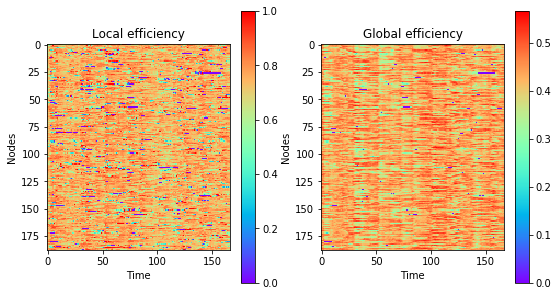

In [55]:
##### loading the efficiency metrics that have been pre-calculated
f = np.load(os.path.join('DataML',
                         'Leiden_sub39335_Rt2_K200_Efficiency.npz'))
ElocMat = f['ElocMat']
EglobMat = f['EglobMat']


##### plotting efficiency over time
plt.figure(figsize=[9,5])
plt.subplot(121)
plt.imshow(ElocMat, cmap=plt.cm.rainbow)
plt.title('Local efficiency')
plt.xlabel('Time')
plt.ylabel('Nodes')
plt.colorbar()

plt.subplot(122)
plt.imshow(EglobMat, cmap=plt.cm.rainbow)
plt.title('Global efficiency')
plt.xlabel('Time')
plt.ylabel('Nodes')
plt.colorbar()

plt.show()

Here, rows represent different nodes, and columns represent time. As you can see, there are some time points where efficiencies change dramatically (manifesting as a vertical *edge*, more apparent in global efficiency).

## Brain states

So, there seems to be system-wide changes occurring at different points during this experiment. In fact, so-called resting-state is made up of distinct states with similar connectivity patters. These states are discrete, and transitions from one state to another in a short period of time.

We can identify different brain states by K-means clustering. In particular, we ***cluster time points*** into different clusters of similar connectivity patterns. In other words, correlation coefficients are features, and time points are observations to be clustered. To do so, we re-organize the correlation matrix at each time point into a single vector, and use them as features in K-means clustering.

In [60]:
##### Converting correlation matrices to vectors
nNodes = Rmat.shape[-1]
nTime = Rmat.shape[0]
indR = np.triu_indices(nNodes,1) # indices for the upper triangle of R
# initializing the data array, rows = time, cols = correlation
Rdata = np.zeros((nTime,len(indR[0])))
for iTime in range(nTime):
    R = Rmat[iTime,:,:]
    Rdata[iTime,:] = R[indR]

Just FYI, at each time point there are 17578 correlation coefficients; that's why we cannot plot correlation matrices directly!

In [59]:
Rdata.shape

(167, 17578)

Next, we generate a **Scree plot** to determine K for K-means clustering. This K is the distinct number of brain states. 

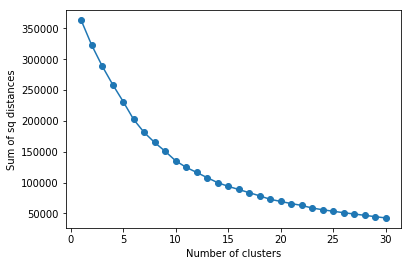

In [61]:
###### Clustering --- Figuring out the  number of clusters
# determinging the number of clusters (up to 30 clusters)
SSE = []
for iClus in range(1,31):
    #print('Number of clusters: %d' % iClus)
    # K-means clustering
    km = KMeans(n_clusters=iClus)  # K-means with a given number of clusters
    km.fit(Rdata)  # fitting the principal components
    SSE.append(km.inertia_) # recording the sum of square distances

# plotting the sum of square distance
plt.plot(np.arange(1,31),SSE,marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sq distances')
plt.show()

Again, the *elbow* in a scree plot is somewhat subjective. In our case, we will go with K=6 as the elbow. 

In [62]:
###### Clustering --- with K=6
km = KMeans(n_clusters=6)  # defining the clustering object
km.fit(Rdata)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates

We have cluster assignments stored in an array **`y_clus`**. We can plot `y_clus` and the global efficiency over time. 

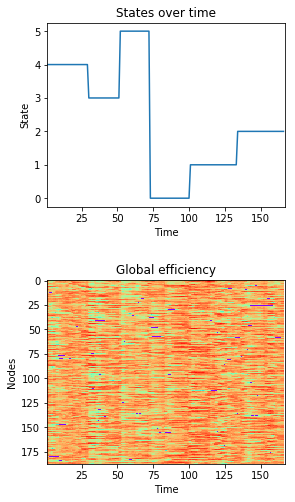

In [64]:
####### plotting cluster over time
plt.figure(figsize=[4,7])
plt.subplot(211)
plt.plot(y_clus)
plt.title('States over time')
plt.xlabel('Time')
plt.ylabel('State')
plt.xlim(1,nTime)

plt.subplot(212)
plt.imshow(EglobMat, cmap=plt.cm.rainbow, aspect='auto')
plt.title('Global efficiency')
plt.xlabel('Time')
plt.ylabel('Nodes')
plt.xlim(1,nTime)

plt.subplots_adjust(left=0.15, right=0.975, top=0.95, bottom=0.075,
                    hspace=0.4)
plt.show()


As you may notice, state changes corresponds to vertical edges in the global efficiency plot.

# 6. Other clustering methods
<hr style="height:1px;border:none" />

We only covered K-means clustering, but that is just one of many clustering algorithms. Each clustering algorithm has strengths and weaknesses depending on how observations are clustered. Here are some examples of clustering algorithms.

<img style="width: 764px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Cluster_ClusterExamples.png?raw=true" alt="Clustering algorithms examples"/>

As you can see, no algorithm works in all settings. Here is a list of different clustering algorithms available in Scikit-learn.

<img style="width: 792px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Cluster_Table.png?raw=true" alt="A table of clustering algorithms"/>

# 7. Classification: k-nearest neighbors (KNN)
<hr style="height:1px;border:none" />

## I want to fit in like everybody else

Now, let's think a simple **classification** problem. Say there are two classes of data points. And you have a new observation to be classified into one of the two classes. 

[`<kNN_2Clusters.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/kNN_2Clusters.py)

In [2]:
%matplotlib inline

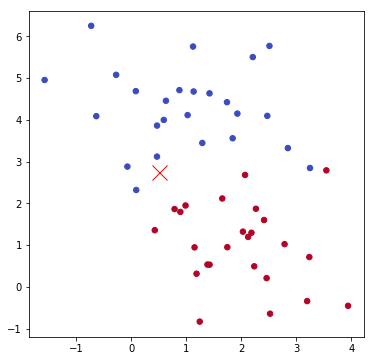

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier


# producing a toy data set: two clusters, separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.0)


# plotting the toy data plus a new observation
x_new = 0.5
y_new = 2.75
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.plot(x_new, y_new, marker='x', c='r', ms=15)
plt.show()

See the new observation (red X). Should this be classified as blue or red? We can classify based on the observations around it.

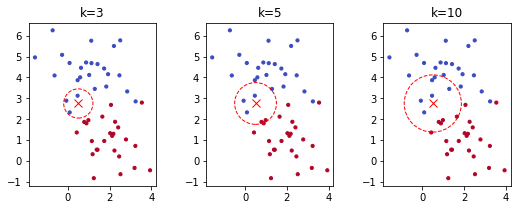

In [4]:
# k nearest neighbors
plt.figure(figsize=[9,3])
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=0.7, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=3')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.0, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=5')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.plot(x_new, y_new, marker='x', c='r', ms=8)
circle = plt.Circle((x_new, y_new), radius=1.37, color='r', linewidth=1,
                    ls='--', fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal')
plt.title('k=10')

plt.show()

These plots show circles encompassing $k$ ($k=3$, $5$, and $10$) nearest neighbors of the new observation. We can classify the new observation as the most abundant class in each of the circles. In this case,
  * $k=3$: Blue=3 $\rightarrow$ Classified as Blue
  * $k=5$: Blue=3, Red=2 $\rightarrow$ Classified as Blue
  * $k=10$: Blue=6, Red=4 $\rightarrow$ Classified as Blue

As you can see, voting among $k$ nearest neighbors enables classification of a new observation without an explicit model. This classification method is known as the **k nearest neighbor** **(kNN** or **KNN)** method. 

The k nearest neighbor method is implemented as the **`KNeighborsClassifier`** transformation object in **`sklearn.neighbors`**. Here is an example.

In [5]:
# k nearest neighbor classifier object
kNN5 = KNeighborsClassifier(5, weights='uniform')
kNN5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The first parameter of `KNeighborsClassifier` is **`k`**, the number of nearest neighbors to be considered. The parameter **`weights='uniform'`** indicates that all k neighbors count equally in the voting process for classification. This is a **supervised learning** method, so we need to provide both the feature data as well as the target information in the **`.fit()`** method. The `.fit()` method implements the actual learning process from the data to generate a **classifier**, an object that can classify group assignments (or labels) based in input features.

Just for fun, let's plot the decision boundary in this case, showing the boundary between one class vs another, plotted in a 2D space. I have written some custom functions in a file [**`DecisionBoundary.py`**](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/DecisionBoundary.py) for that purpose. We can use one of these functions, `plot_contours`, by 
```python
from DecisionBoundary import plot_contours
```
(no `.py` is necessary).

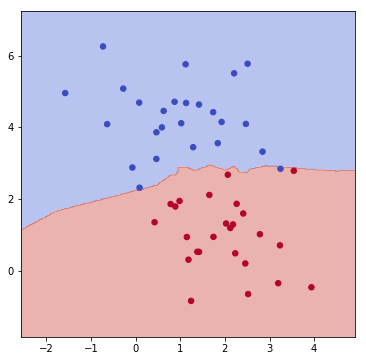

In [6]:
# decision boundary
from DecisionBoundary import plot_contours

plt.figure(figsize=[6,6])
ax = plt.subplot(111)
plot_contours(ax, kNN5, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.show()

The choice of k influences the decision boundary. Here are examples with different values of k.

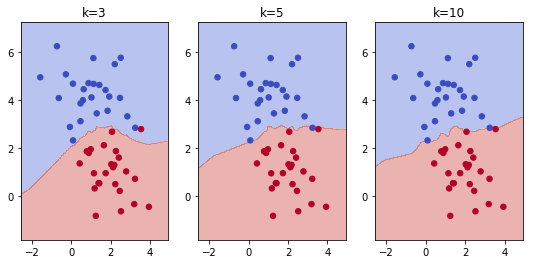

In [7]:
# k nearest neighbor classifier object with different k
kNN3 = KNeighborsClassifier(3, weights='uniform')
kNN3.fit(X,y)

kNN10 = KNeighborsClassifier(10, weights='uniform')
kNN10.fit(X,y)


# decision boundary
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, kNN3, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=3')

ax = plt.subplot(132)
plot_contours(ax, kNN5, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=5')

ax = plt.subplot(133)
plot_contours(ax, kNN10, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=10')

plt.show()

The larger the parameter k is, the smoother the decision boundary becomes. A small k may lead to a problem known as **over-fitting**, where the classifier works very well only for the given training data, and may not be generalized to other data.

## Ties

Depending on the number of classes, the choice of certain values of k may lead to ties, or the number of equal votes in more than one class in a neighborhood. For example, in a 2-class classification problem, if k is an even number, then the number of votes for each class may be k/2 and cannot conclude which class is more appropriate. If such ties happen, then there is no definitive answer as to how the predicted class is chosen.  Here is the warning from the `sklearn` documentation:

>**Warning** Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data. 

So a choice of k with potential ties should be avoided.
  * For a 2-class classification, k should not be an even number
  * For a classification into p classes, k should not be a multiple of p.
     * **e.g.**, 3-class classification, then k shouldn't be 3, 6, 9 , 12, ..

## Weighted by the distance

One way to avoid the problem with ties is to give more weights to votes that are closer to the new observation. In other words, k votes are no longer counted as equals, but those closer to the new observation should account more, and vice versa. This can be implemented by setting the parameter **`weights='distance'`** in `KNeighborsClassifier`. However, the use of the distance information may lead to over-fitting. Here are examples of k neighbor classifiers on the same data, but this time with `weights='distance'` in stead of `uniform`.

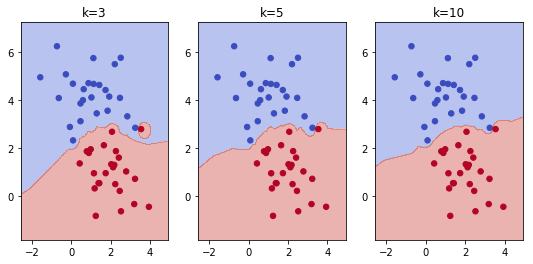

In [8]:
# k nearest neighbor classifier object with different k
# now weighted by the distance
kNN3dist = KNeighborsClassifier(3, weights='distance')
kNN3dist.fit(X,y)

kNN5dist = KNeighborsClassifier(5, weights='distance')
kNN5dist.fit(X,y)

kNN10dist = KNeighborsClassifier(10, weights='distance')
kNN10dist.fit(X,y)


# decision boundary
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, kNN3dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=3')

ax = plt.subplot(132)
plot_contours(ax, kNN5dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=5')

ax = plt.subplot(133)
plot_contours(ax, kNN10dist, X[:, 0], X[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title('k=10')

plt.show()

You can see that the boundary curves around a few observations near the boundary.

# 8. KNN Example: iris data
<hr style="height:1px;border:none" />

Here, we apply the kNN method to the iris data. We will focus on ***two features (sepal length and petal width)***. But before doing that here are some things to consider.

### Balance between classes

It is important that the numbers of data points belonging to different classes are **balanced**. If classes were unbalanced (i.e., one class is more represented than the others), then your classifier might classify all observation into the most dominant class. For example, if there were 900 Setosas, 50 Versicolours, and 50 Virginicas, then a classifier could achieve close to 90% accuracy by classifying all observations as Setosas!

### Training and testing data sets

When you have a classifier, and want to examine how accurately it can classify, it is a good idea to have two separate data sets: training data and testing data. Both the features and the target labels from the training data set are used to generate a classifier. Then the feature information (but not target labels!) from the testing data is fit to the classifier, in order to examine how accurately it can classify, or predict the class labels. For this particular example, we will use 90 observations (or 60% of data) as the training data set, and the remaining 60 observations (or 40% of data) as the testing data set.

Now let's learn a KNN classifier for the iris data. First we load the necessary libraries and the data.

[`<IrisKNN.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisKNN.py)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from DecisionBoundary import plot_contours   # plotting decison boundary


# Loading the iris data
iris = datasets.load_iris()
X = iris.data[:,[0,3]]  # sepal length and petal width only
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

Now the *training* and *testing* data. There is a function called **`train_test_split`** under **`sklearn.model_selection`**. This function randomly split a data set into training and testing data sets. You can specify the proportion of the data to be saved later as the testing data (**`test_size`** parameter). In this example, we will use 40% (`test_size=0.4`) as the testing data. 

In [2]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)

Here, the features **`X`** and the labels **`y`** have been split into the training data (**`X_train`** (features) and **`y_train`** (labels)) and the testing data (**`X_test`** and **`y_test`**). We can also supply the **`random_state`** parameter with a number; this initializes a random number generator. If you set the `random_state` parameter the same, you can regenerate the same random numbers (thus the same training and testing data sets).

Now let's train the classifier. Here, we use `k=5` and `k=20`, as well as `weights='uniform'` and `weights='distance'` in our kNN classifiers.

In [5]:
# k nearest neighbor classifier objects
kNN5uni = KNeighborsClassifier(5, weights='uniform')
kNN5uni.fit(X_train,y_train)

kNN5dist = KNeighborsClassifier(5, weights='distance')
kNN5dist.fit(X_train,y_train)

kNN20uni = KNeighborsClassifier(20, weights='uniform')
kNN20uni.fit(X_train,y_train)

kNN20dist = KNeighborsClassifier(20, weights='distance')
kNN20dist.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

And we predict labels for the testing data. In this case, we only supply the features in the **`.predict()`** method associated with each classifier.

In [6]:
# Predicted classes
y_pred_5uni = kNN5uni.predict(X_test)
y_pred_5dist = kNN5dist.predict(X_test)
y_pred_20uni = kNN20uni.predict(X_test)
y_pred_20dist = kNN20dist.predict(X_test)

We can see the resulting decision boundaries, with testing data overlaid.

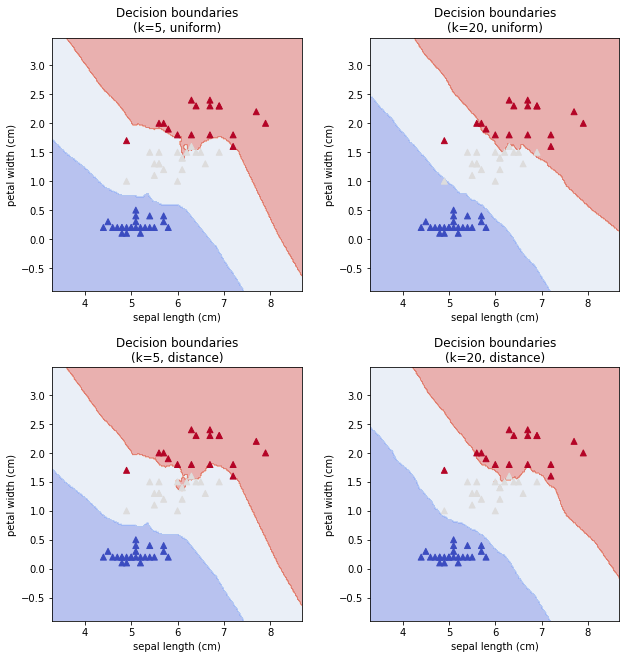

In [7]:
# plotting the boundaries and the testing data
plt.figure(figsize=[9,9])
ax = plt.subplot(221)
plot_contours(ax, kNN5uni, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=5, uniform)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(222)
plot_contours(ax, kNN20uni, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=20, uniform)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(223)
plot_contours(ax, kNN5dist, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=5, distance)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(224)
plot_contours(ax, kNN20dist, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\n(k=20, distance)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

plt.subplots_adjust(hspace=0.3, wspace=0.275,
                    bottom=0.05, top=0.95, left=0.10, right=0.975)
plt.show()


## Assessing the classification performance

We can examine the classification results more closely. A good tool to examine classification results is a **confusion matrix**. In this matrix, the rows represent true class labels, and the columns represent different classes in the predicted classes from the testing data. If everything is classified accurately, then all observations are tallied on the main diagonal. Any off-diagonal elements are mis-classified observations. The confusion matrix allows us to examine in which categories observations are incorrectly classified. 

There is a function called **`confusion_matrix`** under **`sklearn.metrics`**. You just need to provide the target labels (the first input argument) and predicted labels (the second input argument). 

In [8]:
# classifier performance
print('K=5, uniform\n', confusion_matrix(y_test,y_pred_5uni))
print('\nK=5, distance\n', confusion_matrix(y_test,y_pred_5dist))
print('\nK=20, uniform\n', confusion_matrix(y_test,y_pred_20uni))
print('\nK=20, distance\n', confusion_matrix(y_test,y_pred_20dist))

K=5, uniform
 [[24  0  0]
 [ 0 17  2]
 [ 0  3 14]]

K=5, distance
 [[24  0  0]
 [ 0 14  5]
 [ 0  2 15]]

K=20, uniform
 [[24  0  0]
 [ 1 17  1]
 [ 0  2 15]]

K=20, distance
 [[24  0  0]
 [ 0 15  4]
 [ 0  1 16]]


Here, we see that all Setosas (first row / first column) are classified correctly. However, one Versicolor (second row) was classified as Virginica (third column). **`k=20, uniform`** seems to perform well in this scenario.

There is also a function called **`classification_report`** under **`sklearn.metrics`**. This function calculates various metrics of classification performance under different classes. Like the `confusion_matrix` function, you provide the target labels (the first input argument) and predicted labels (the second input argument). You can also provide the target names as the parameter **`target_names`**. Here, we focus on `k=20` and `uniform`.

In [9]:
print(classification_report(y_test, y_pred_20uni,
                            target_names=target_names))

              precision    recall  f1-score   support

      setosa       0.96      1.00      0.98        24
  versicolor       0.89      0.89      0.89        19
   virginica       0.94      0.88      0.91        17

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



Here, 
  * **precision** refers to the ratio of the true positives (tp) to the sum of true positives (tp) and false positives (fp). i.e., tp/(tp+fp). In other words, the proportion of true positives among all positives discovered by the classifier.
  * **recall** refers to the ratio of the true positives (tp) to the sum of the true positives (tp) and false negatives (fn). i.e., tp/(tp+fn). In other words, the proportion of all positives discovered by the classifier among all the positives that should have been discovered by the classifier. Also known as *sensitivity* in statistics lingo.
  * **support** refers to the number of observations in that class. 

# 9. Classification: support vector machine (SVM)
<hr style="height:1px;border:none" />

## The line must be drawn here

Let's say, you have two clusters of data points that are separated from each other. 

[`<SVM_2Clusters.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/SVM_2Clusters.py)

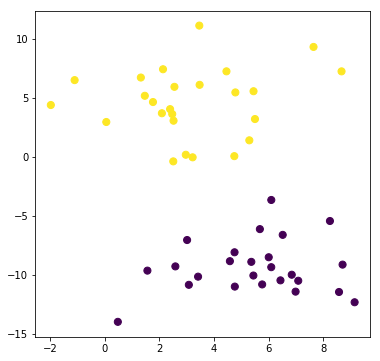

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# producing a toy data set: two clusters, separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=10, cluster_std=2.5)


# plotting the toy data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

Now, you want to draw a boundary between the two clusters, so that any future observations can be classified by which side of the boundary they lie. You can draw many possible boundaries, for example.

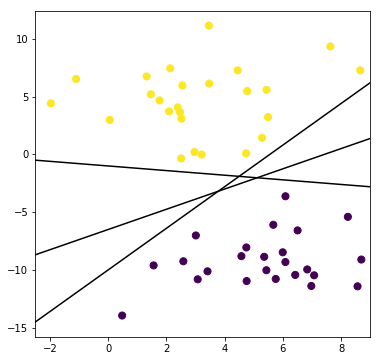

In [11]:
# plotting possible boundaries
xMin = -2.5
xMax = 9.0
xfit = np.linspace(xMin, xMax)
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b in [(0.875, -6.5), (-0.2, -1), (1.8, -10)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(xMin, xMax)
plt.show()

Now, which one is the most appropriate in this case? We can use a criterion that the boundary must separate the two clusters the most. In other words, the distance between the observations and the boundary must be maximized.

In our example, let's examine the distance between the boundary and the data point closest to the boundary, known as the **margin**.

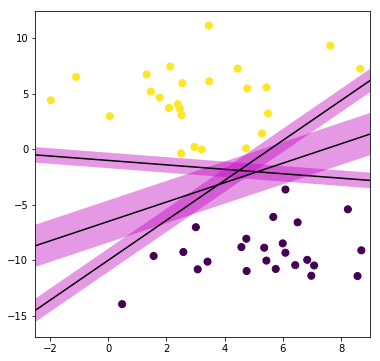

In [12]:
# plotting possible boundaries with margins
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b, d in [(0.875, -6.5, 1.9), (-0.2, -1, 0.7), (1.8, -10, 1.05)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'k-')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='m', alpha=0.4)
plt.xlim(xMin, xMax)
plt.show()

As you notice, the margin is different between the different boundaries. The goal of the **support vector machine** **(SVM)** algorithm is to find the boundary that maximizes the margin.

## SVM, a simple example

The SVM algorithm is implemented in **`sklearn.svm`** as the **`SVC`** transformation object. Here is how we can use the `SVC` object.

In [13]:
# SVM
sv = SVC(kernel='linear', C=10000)
sv.fit(X,y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Here, we define the `SVC` object with two parameters. The parameter **`kernel='linear'`** defines that the boundary is a line (thus *linear*). The parameter **`C=10000`** defines the penalty for the error term. We will explore this `C` parameter later. Once the `SVC` object is defined, then we use the **`.fit`** method to fit the data (features and targets) to run the SVM algorithm. Here is the result.

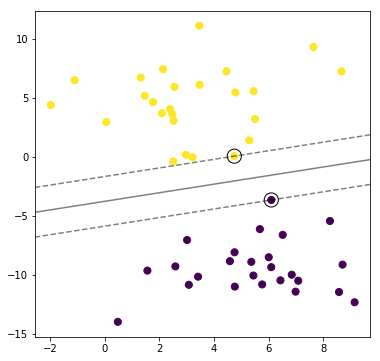

In [14]:
# plotting the descision boundary with SVM, with margins
# as well as support vectors
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

# suppor for the meshgrid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = sv.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(sv.support_vectors_[:, 0], sv.support_vectors_[:, 1], s=200,
           linewidth=1, edgecolors='k', facecolors='none')

plt.show()

Here, the line indicates the boundary, and the dotted lines indicate the margin. The closest points on both sides of the boundary are circled. These points are called **support vectors** (SV) (the namesake of the SVM algorithm). These boundaries are pivotal in defining the boundary. In fact, these are the only points needed to define the boundary.

You can examine the coordinates of these support vectors by the **`.support_vectors_`** of the SVM object. The coordinate for the first SV is

In [15]:
# coordinate for the first SV
print(sv.support_vectors_[0,:])

[ 6.09158828 -3.62254269]


It looks like this SV belongs to the purple cluster. The coordinate for the second SV is

In [16]:
# coordinate for the second SV
print(sv.support_vectors_[1,:])

[4.74046126 0.08979735]


And this belongs to the yellow cluster.

## SVM classifier

Of course, the point of finding the boundary is so that we can use it to classify observations. To demonstrate, we split the toy data into a training and testing data sets. The testing data contains 10 observations (as specified by **`test_size=10`**).

In [17]:
# split the toy data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=10, 
                                                    random_state=0)

Now let's run SVM on the training data. As you have seen before, you can use the **`.predict`** method with the testing data to produce predicted class labels.

In [18]:
# SVM fitting
sv_train = SVC(kernel='linear', C=10000)
sv_train.fit(X_train,y_train)

# SVM classifier
y_pred = sv_train.predict(X_test)

And finally, let's see the classification results.

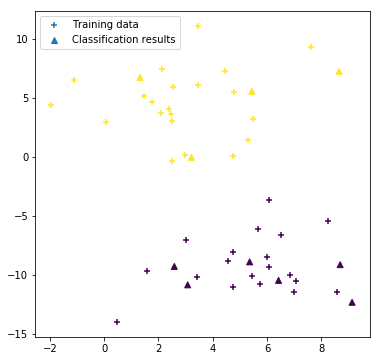

In [19]:
# plotting the training data and classification outcome
plt.figure(figsize=[6,6])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='+',
            label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='^',
            label='Classification results')
plt.legend()
plt.show()

Since these are well-separated clusters, we had a pretty good classification outcome.

## Hard and soft margins

Now let's consider a case where two clusters are not clearly separated, but have some overlap.

[`<SVM_SoftMargins.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/SVM_SoftMargins.py)

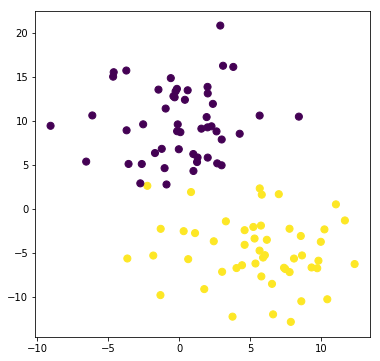

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from DecisionBoundary import plot_svm_margin

# producing a toy data set: two clusters, with some overlap
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=23, cluster_std=3.75)


# plotting the toy data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

(Here, don't worry about the function `plot_svm_margin`; it is a custom function in `DecisionBoundary.py`) As you can see, the two clusters are touching a little bit. In a case like this, a simple line cannot separate the two clusters without some misclassification. The parameter **`C`** mentioned earlier controls how much such misclassification you allow. In other words, how many observations may lie within the classification margin. A large value of **`C`** permits fewer observations in the margin (referred as a **hard margin**), whereas a smaller value of `C` allows many observations to lie within the margin (referred as a **soft margin**). In other words, `C` controls how hard or soft the margin is. Here are examples of SVM with different values of `C` (large:**`C=10`**, medium:**`C=1.0`**(default in SVC), small:**`C=0.1`**, and tiny:**`C=0.01`**).

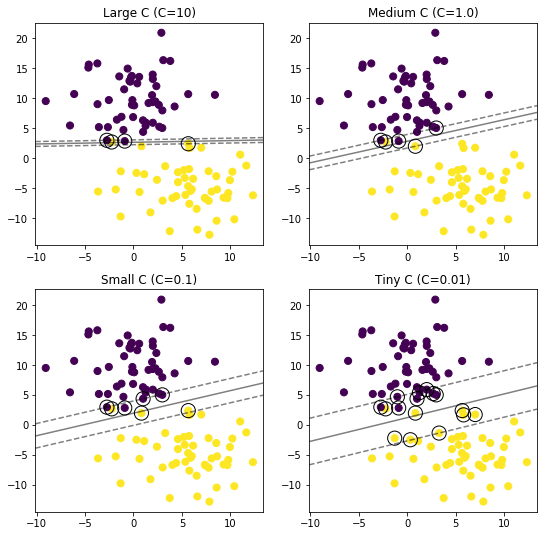

In [3]:
# SVM
plt.figure(figsize=[9,9])

svL = SVC(kernel='linear', C=10)  # large C (C=10)
svL.fit(X,y)
plt.subplot(221)
plot_svm_margin(X,y,svL)
plt.title('Large C (C=10)')

svM = SVC(kernel='linear', C=1.0)  # medium C (C=1.0)
svM.fit(X,y)
plt.subplot(222)
plot_svm_margin(X,y,svM)
plt.title('Medium C (C=1.0)')

svS = SVC(kernel='linear', C=0.1)  # small C (C=0.1)
svS.fit(X,y)
plt.subplot(223)
plot_svm_margin(X,y,svS)
plt.title('Small C (C=0.1)')

svT = SVC(kernel='linear', C=0.01)  # tiny C (C=0.01)
svT.fit(X,y)
plt.subplot(224)
plot_svm_margin(X,y,svT)
plt.title('Tiny C (C=0.01)')

plt.show()

As you can see, the larger the parameter `C`, the fewer the number of support vectors lying within the margin. And vice versa. 

So, how do we determine the value of `C` that works for your data? We do so by fitting different training data sets repeatedly and evaluate the classifier performance, the process known as *cross validation*. We will cover cross validation later.

# 10. SVM example: iris data
<hr style="height:1px;border:none" />

## Multi-class SVM

The concept of SVM makes sense for a binary classification problem. But what if there are more than 2 classes in the target? In that case, we can take two approaches:

  * **One-versus-rest (OVR)**: In this approach, each class is compared to the rest of classes in a separate SVM. Then the predicted class label is based on the class that gives the largest distance from the boundary. 
  * **One-versus-one (OVO)**: In this approach, all possible pairs of classes are compared with a 2-class SVM. For each observation, we count the number of times that observation has been classified to a particular class. The class with the most *vote* is selected as the predicted class.
  
By default, `SVC` uses the OVR approach, so we will use it for our next example.


## Example: iris data

As you recall, there are 3 classes in the iris data. While one of the classes (Setosa) is separated well from the other classes, the remaining two classes are somewhat overlapping.

[`<IrisSVM.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisSVM.py)

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

We will be using 100 observations as the training data, and the remaining 50 as the testing data.

In [5]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=50, 
                                                    random_state=0)

Will fit the training data with `C=0.1`, allowing softer margins.

In [6]:
# SVM model fitting
sv = SVC(kernel='linear', C=0.1)
sv.fit(X_train,y_train)

# SVM classifier
y_pred = sv.predict(X_test)   # predicted class


Let's take a look at the classification results.

In [7]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


In [8]:
# classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



So it did a good job.

# 11. Kernel methods
<hr style="height:1px;border:none" />

## Boundaries that are not straight

The SVMs we have seen so far work well if boundaries are defined as straight lines. But let's consider this case.

[`<SVM_Circles.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/SVM_Circles.py)

In [1]:
%matplotlib inline

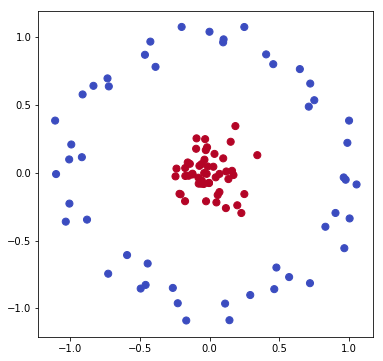

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC
from DecisionBoundary import plot_svm_margin



# Creating a toy data with circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=88)

# plotting the data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.coolwarm)
plt.show()


Here, the clusters can be separated by a straight line anymore. What can we do?

Let's calculate a new feature **`r`** defined as the distance of each observation from the origin (0,0). In other words,

In [3]:
# calculating the radius
r = np.sum(X**2, axis=1)**0.5

Then we replace the second feature (plotted on the y-axis) with this `r`.

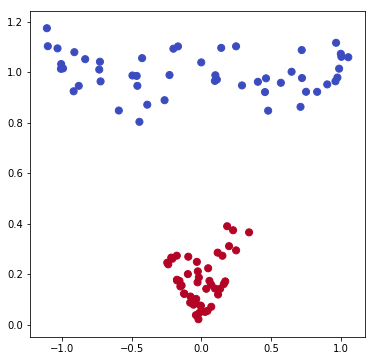

In [4]:
# plotting the data, y-axis replaced with the radius
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], r, c=y, s=50, cmap=plt.cm.coolwarm)
plt.show()

Now you can separate the two clusters by a line. So, we can perform an SVM on this transformed data.

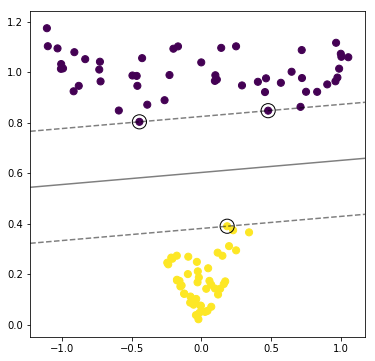

In [5]:
# SVM
R = np.vstack([X[:, 0], r]).T
sv = SVC(kernel='linear', C=10000)
sv.fit(R,y)


# plotting the margin on the SVM of the transformed data
plt.figure(figsize=[6,6])
plot_svm_margin(R,y,sv)
plt.show()

The downside of this approach is that you have to transform a feature manually. The resulting boundary also needs to be inverse transformed back to the original feature space.

To solve this issue, **`SVC`** comes with a built-in data transformation methods, known as **kernel methods**. A **kernel** is the spatial transformation from the original space to another feature space where observation clusters can be linearly separable. If you use a built-in **kernel** in `SVC`, then you don't have to worry about actually transforming the data. 

To use a kernel method, you have to specify the parameter **`kernel`** in the `SVC` object. The choices include **`rbf`** (radial basis function: similar to the radius transformation we used earlier) and **`poly`** (polynomial: a feature is expressed as a polynomial, e.g., $x^2$, $-4x^3+2x^2-0.5x+6.5$). The optimal parameters for these transformation is determined by `SVC`. Here is an example of the `rbf` kernel.

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


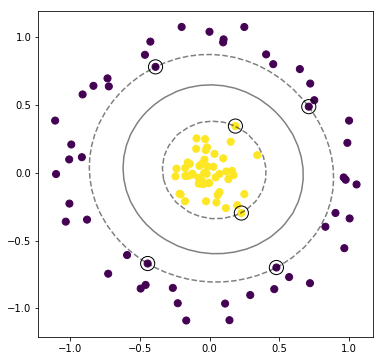

In [6]:
# SVM with RBF kernel
svRBF = SVC(kernel='rbf', C=10000)
svRBF.fit(X,y)

# plotting the margin on the SVM with the RBF kernel
plt.figure(figsize=[6,6])
plot_svm_margin(X,y,svRBF)
plt.show()

## Example: iris data with a kernel method

Recall earlier we applied an SVM to the iris data with linear boundaries. Now let's see SVMs with `rbf` and `poly` kernels. We will focus only on two of the features (sepal length and petal width) so that we can plot the decision boundaries later.

[`<IrisKernelsSVM.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisKernelSVM.py)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from DecisionBoundary import plot_svm_margin, plot_contours



# Loading the iris data
iris = datasets.load_iris()
X = iris.data[:,[0,3]]  # sepal length and petal width only
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)

The data set has been split into the training and testing data sets, with the testing data comprising 40% of observations.

First, SVM with the linear kernel, and its classification performance on the testing data.

In [8]:
# SVM on training data (Linear)
svLin = SVC(kernel='linear',C=1.0)
svLin.fit(X_train,y_train)

# Predicted classes (Linear)
y_pred_Lin = svLin.predict(X_test)

# Confusion matrix (Linear)
print(confusion_matrix(y_test,y_pred_Lin))

# classification report (Linear)
print(classification_report(y_test, y_pred_Lin,
                            target_names=target_names))

[[24  0  0]
 [ 0 18  1]
 [ 0  0 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Next, the RBF kernel.

In [9]:
# SVM on training data (RBF)
svRBF = SVC(kernel='rbf',C=1.0)
svRBF.fit(X_train,y_train)

# Predicted classes (RBF)
y_pred_RBF = svRBF.predict(X_test)

# Confusion matrix (RBF)
print(confusion_matrix(y_test,y_pred_RBF))

# classification report (RBF)
print(classification_report(y_test, y_pred_RBF,
                            target_names=target_names))

[[24  0  0]
 [ 0 19  0]
 [ 0  1 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        17

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


And finally, the polynomial kernel.

In [10]:
# SVM on training data (Polynomial)
svPoly = SVC(kernel='poly',C=1.0)
svPoly.fit(X_train,y_train)

# Predicted classes (Polynomial)
y_pred_Poly = svPoly.predict(X_test)

# Confusion matrix (Polynomial)
print(confusion_matrix(y_test,y_pred_Poly))

# classification report (Polynomial)
print(classification_report(y_test, y_pred_Poly,
                            target_names=target_names))

[[24  0  0]
 [ 0 19  0]
 [ 0  2 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.90      1.00      0.95        19
   virginica       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Just looking at the classifier performances doesn't seem to show the difference among these methods. So, now let's take a look at the decision boundaries (with testing data overlaid). 

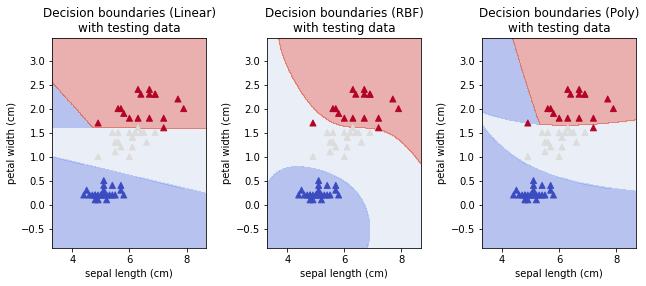

In [11]:
# plotting the boundaries and the testing data
plt.figure(figsize=[9,4])
ax = plt.subplot(131)
plot_contours(ax, svLin, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries (Linear)\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(132)
plot_contours(ax, svRBF, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries (RBF)\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

ax = plt.subplot(133)
plot_contours(ax, svPoly, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries (Poly)\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

plt.subplots_adjust(wspace=0.4, bottom=0.15, left=0.075, right=0.975)
plt.show()

# 12. Cross validation
<hr style="height:1px;border:none" />

## What is cross validation?

We have used a training data set to generate a classifier and a testing data set to evaluate the performance of the resulting classifier. But how can we be sure that the classification results are consistent regardless of which training and testing data sets are used? One way to verify is to generate multiple training and testing data sets and evaluate classification performance multiple times. **Cross validation** is one such approach. In a **k-fold** cross validation, the data set is divided into k equal sizes. In the first iteration, the first of the k segments is used as the testing data set, while the remaining k-1 segments are used as the training data set. In the second iteration, the second segment is used as the testing data set. And so on. Here is a schematic of 5-fold cross validation.

<img style="width: 500px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/CV_5fold.png?raw=true" alt="5-fold cross validation"/>

As you can see, a k-fold validation enables the classification performance evaluation k times. 

## Example: iris data

Let's perform a 5-fold cross validation on the iris data. 


[`<IrisCV.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisCV.py)

In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

First, we need to define a classifier object to be examined by the cross validation. Here, we use a k nearest neighbor (kNN) classifier.

In [13]:
# defining the nearest neighbor classifier
kNN = KNeighborsClassifier(5, weights='uniform')

As for the actual cross validation, we can use the **`cross_val_score`** function in **`sklearn.model_selection`**. In `cross_val_score`, we need to provide the classifier object as an input parameter, as well as the data matrix for the features and the target variable. The number of *folds* can be specified by the parameter **`cv`**. Then `cross_val_score` splits the data into k-folds and perform a classifier analysis (building and evaluating a classifier) k times automatically. The results can be returned as the **accuracy** score. The **accuracy** is defined by the proportion of observations correctly classified, compared to all available observations. Or, in a confusion matrix, the total number of observation along the main diagonal, divided by the total number of observations in a testing data.

In [14]:
# 5-fold cross validation
scores = cross_val_score(kNN, X, y, cv=5)
print(scores)
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


# 13. Choosing parameters for classifiers
<hr style="height:1px;border:none" />

As you have seen before, most classifiers require some sort of fine tuning of parameters to adjust for different data sets. One way to find an optimal parameter(s) is to perform cross validation with different values for the parameter, and choose the parameter that produces the best results. 

## Example: iris data

If there is just one parameter to be adjusted, then you can write a simple program to learn a classifier with different parameter values. For example, in our iris data example,

[`<IrisGridSearchKNN.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisGridSearchKNN.py)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Loading the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


Let's say we want to use a k nearest neighbor classifier. What is the optimal value of k for our data? We can perform cross validation with different values of k, and record the mean accuracy score for each value of k. 

In [16]:
# loop over k
meanScores = []
for k in range(5,20,2):
    # defining the nearest neighbor classifier
    kNN = KNeighborsClassifier(k, weights='uniform')

    # 5-fold cross validation
    scores = cross_val_score(kNN, X, y, cv=5)
    meanScores.append(scores.mean())

And we can plot the mean score against k to see what value of k we should use.

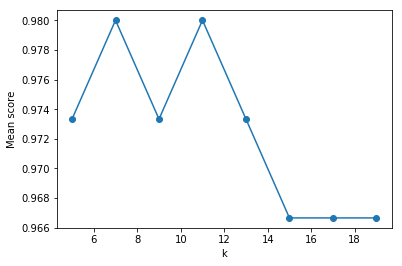

In [17]:
# plotting the mean score vs k
plt.plot(np.arange(5,20,2), meanScores, 'o-')
plt.xlabel('k')
plt.ylabel('Mean score')
plt.show()

Looks like k=7 is a good choice for this data set. You can search an optimal parameter this way.

Or, there is a tool called **`GridSearchCV`** under **`sklearn.model_selection`**. It performs cross validation for different values of parameters, and pick the best one for you. To use `GridSearchCV`, first you have to define combinations of parameter values to be examined.

In [18]:
# using a grid search
param = {'n_neighbors':list(range(5,20,2)),
         'weights':['uniform', 'distance']}

Here, possible values of parameters are stored in a *dictionary* called **`param`**. Notice that the parameter k's actual name is **`n_neighbors`**. We also need to define any other parameters that are not the default values in a classifier. In this case, we will examine **`weights`** to be either **`'uniform'`** or **`'distance'`**, just for fun. The next step is to define the classifier object.

In [19]:
kNN = KNeighborsClassifier()

Here, we don't have to worry about the parameters set in `param`. Now we have a classifier object and the parameter dictionary, we define the grid search object **`GridSearchCV`**.

In [20]:
grid_kNN = GridSearchCV(kNN, param, cv=5)
grid_kNN.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In the grid search object `GridSearchCV`, we need to provide the classifier object and the parameter dictionary. You can specify the number of folds to be used in cross validation as parameter **`cv`**. Here, we try 5-fold cross validation as before. Once the grid search object `GridSearchCV` is defined, then we use the **`fit`** to learn from the features and targets. Here, we provide the entire data set. Now let's see what the winning combination of the parameters was.

In [21]:
print(grid_kNN.best_params_)

{'n_neighbors': 11, 'weights': 'distance'}


So, this time, k=11 seems to be the winner (and `distance` weighting). And here is the mean accuracy score resulting from that combination.

In [22]:
print(grid_kNN.best_score_)

0.9866666666666667


And we can check the winning combination on another testing data set.

In [24]:
# Checking the winning combination
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)
kNN = KNeighborsClassifier(7, weights='uniform')
kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[24  0  0]
 [ 0 18  1]
 [ 0  1 16]]


In [25]:
print(classification_report(y_test, y_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       0.95      0.95      0.95        19
   virginica       0.94      0.94      0.94        17

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



# 14. Dimension reduction with PCA
<hr style="height:1px;border:none" />

There are several unsupervised learning techniques that can be useful in reducing the dimensionality of the data. **Principal component analysis**, or **PCA**, is useful in projecting a high-dimensional data set to a lower dimensional space, a.k.a., **dimension reduction**. To demonstrate this, we shall examine the digits data set available in `Scikit-learn`. This data set contains 1797 observations of hand-written digits (0-9). Each observation is an 8x8 image of a hand-written digit, on a 16-level gray scale. Here are some examples of the digit data.

[`<DigitsPCA.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/DigitsPCA.py)

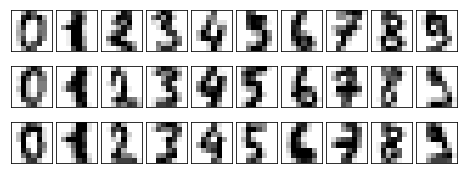

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA


# loading the digits data
digits = datasets.load_digits()
digitsX = digits.data    # the data, 1797 x 64 array
digitsImages = digits.images  # image data, 1797 x 8 x 8
digitsTargets = digits.target # target information
digitsFeatureNames = digits.target_names  # digits


# examples of the digits data
plt.figure(figsize=(8,3))
for iImg in range(3):
    for jImg in range(10):
        plt.subplot(3,10,iImg*10+jImg+1)
        plt.imshow(digitsImages[iImg*10+jImg], cmap=plt.cm.gray_r,
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

Now let's run a PCA with 2 components, and plot the resulting PCs.

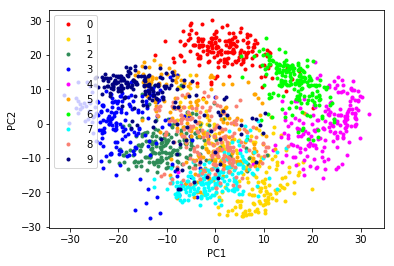

In [27]:
# PCA with largest 2 PCs
digitsPCA = PCA(n_components=2)
digitsPCs = digitsPCA.fit_transform(digitsX)


# plotting the PCs
targetColors=['red','gold','seagreen','blue','fuchsia',
              'orange','lime','cyan','salmon','navy']
for i in range(10):
    plt.plot(digitsPCs[digitsTargets==i,0],
             digitsPCs[digitsTargets==i,1],
             marker='.', ls='none', c=targetColors[i],
             label=digitsFeatureNames[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


As you can see, some digits can be separated easily from other digits (e.g., 0, 4, and 6), whereas some digits are hard to distinguish. 

Now let's take a look at the *eigenimages* corresponding to PC1 and PC2.

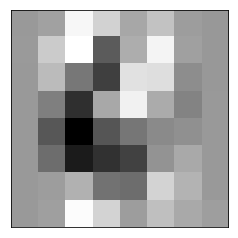

In [28]:
# PC1 eigenimage
plt.imshow(digitsPCA.components_[0,:].reshape([8,8]),cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.show()


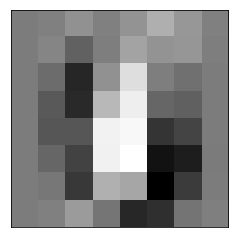

In [29]:
# PC2 eigenimage
plt.imshow(digitsPCA.components_[1,:].reshape([8,8]),cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.show()


In these eigenimages, darker pixels are the pixels contributing large variability, whereas lighter pixels contribute small variability.